# NLP-iarmus: Which Harry Potter Character is the most positive?

### Like most of those born in the 90s, I grew up with Harry Potter, and it remains my all-time favourite book series. 

### In this notebook we will use VADER (Valence Aware Dictionary and Sentiment Reasoner) to analyse the sentiment of the Harry Potter series and uncover differences between characters.

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re #regular expressions
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #VADER
import nltk #natural language toolkit

analyzer = SentimentIntensityAnalyzer() #main VADER object

plt.style.use('fivethirtyeight')
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'] #fivethirtyeight colors

In [3]:
#load texts
n_books = 7
books = ['./stone.txt', './secrets.txt', './azkaban.txt', './fire.txt', 
         './phoenix.txt', './prince.txt', './hallows.txt']

names = ['Harry Potter and the Philosopher\'s Stone', 
         'Harry Potter and the Chamber of Secrets', 
         'Harry Potter and the Prisoner of Azkaban', 
         'Harry Potter and the Goblet of Fire', 
         'Harry Potter and the Order of the Phoenix', 
         'Harry Potter and the Half-Blood Prince', 
         'Harry Potter and the Deathly Hallows']

The .txt files loaded above have **already been extensively cleaned** to standardise their format. **Let's put them all into a single dictionary** to make things easier: 

In [4]:
hp = {} #dictionary containing entire series
for j, book in enumerate(books):
    with open(book, 'r') as f:
        print(book)
        text=f.read().replace('\n', ' ')
        sentences = nltk.tokenize.sent_tokenize(text) #split book into sentences
        title = sentences[0].split(' CHAPTER',1)[0] #get title
        sentences[0] = sentences[0].split(names[j].split()[-1],1)[1] #remove title from text
        chapters = {}
        chap_lines = []
        for i in range(len(sentences)):
            caps = re.findall(r"\b[A-Z][A-Z\'-]*\b", sentences[i]) #chapter headings are all caps
            if len(caps) > 0 and caps[0] == 'CHAPTER':
                chap_lines.append(i)
                spl = sentences[i].split()
                
                if len(caps) == len(spl): #edge case
                    spl[-1] = spl[-1].lower()
                    sentences[i] = ' '.join(spl)
                    caps = re.findall(r"\b[A-Z][A-Z]*\b", sentences[i])
                    
                chapter_number = spl[0]+' '+spl[1] #get chapter number
                chapter_title = sentences[i].split(' '+spl[len(caps)])[0] #get chapter title
                chapter_title = chapter_title.split(spl[1]+' ')[1]
  
                chapters[chapter_number] = (chapter_title)
                sentences[i] = sentences[i].split(spl[len(caps)-1]+' ')[1]
    
        for i, startline in enumerate(chap_lines):
            if i != len(chap_lines)-1: #if it's not the first chapter
                endline = chap_lines[i+1]
                c = sentences[startline:endline]
                k = [key for key in chapters][i]
                chapters[k] = (chapters[k], c)
            else: #if it is the first chapter
                endline = len(sentences)
                c = sentences[startline:endline]
                k = [key for key in chapters][i]
                chapters[k] = (chapters[k], c)                
        
        hp[names[j]] = chapters #add book to overall dictionary
        


./stone.txt
./secrets.txt
./azkaban.txt
./fire.txt
./phoenix.txt
./prince.txt
./hallows.txt


So our big dictionary `hp` contains seven dictionaries, one for each book, that contains an entry for each chapter.

### First let's plot some statistics about the series:

In [5]:
unique_words = []
word_counts = []
sentence_counts = []
words_per_chapter = []
for book in hp:
    word_count = 0
    sentence_count = 0
    words = []
    word_chap_counts = []
    for chapter in hp[book]:
        word_chap_count = 0
        sentence_count += len(hp[book][chapter][1])
        for sentence in hp[book][chapter][1]:
            spl = sentence.split()
            word_count += len(spl)
            word_chap_count += len(spl)
            for word in spl:
                words.append(re.sub(r'\W+', '', word.lower()))
        word_chap_counts.append(word_chap_count)
                
    word_counts.append(word_count)
    sentence_counts.append(sentence_count)
    words_per_chapter.append(np.mean(word_chap_counts))
    unique_words.append(len(set(words)))

#turn into arrays for ease of plotting
word_counts = np.array(word_counts)
unique_words = np.array(unique_words)
sentence_counts = np.array(sentence_counts)
words_per_chapter = np.array(words_per_chapter)

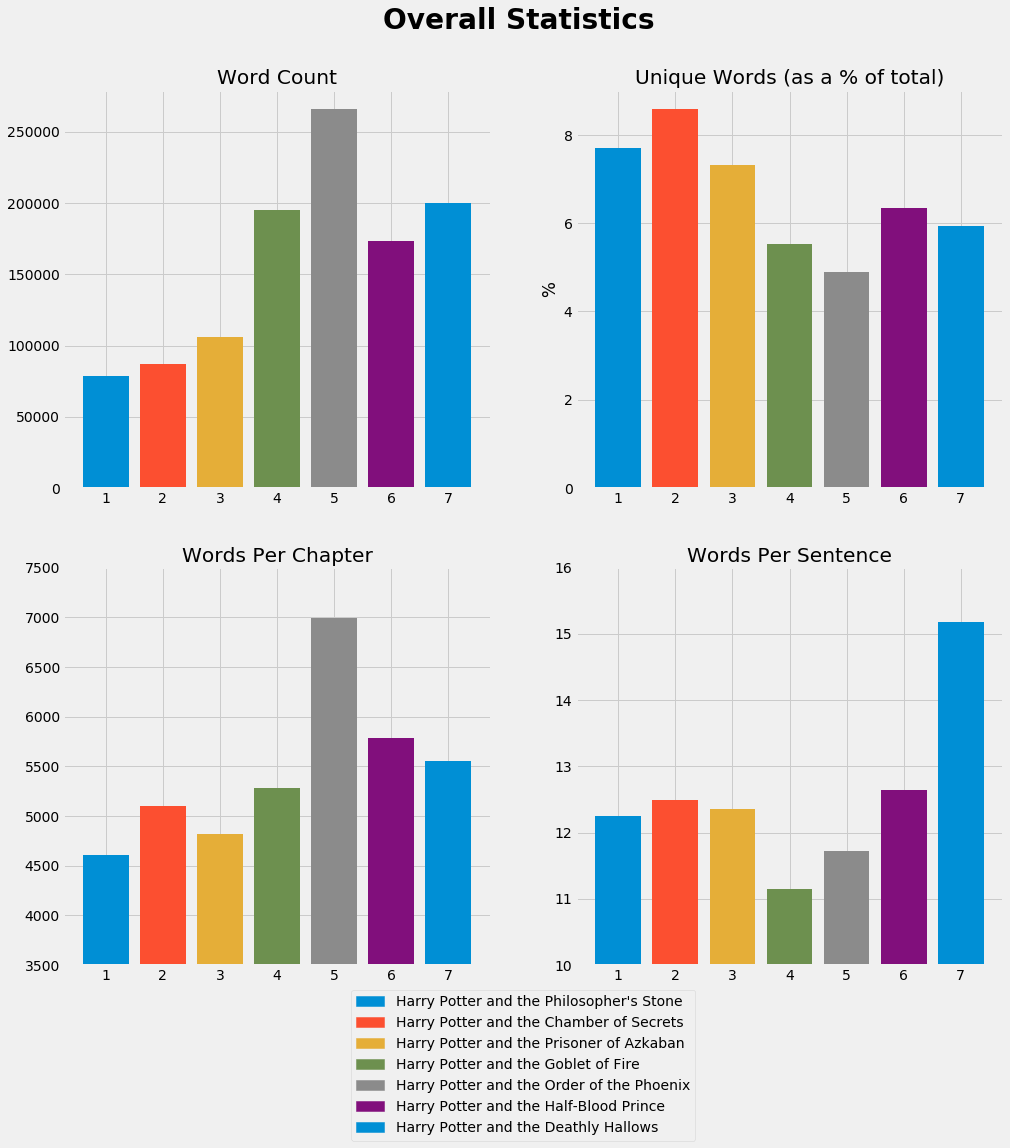

In [6]:
#plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
x = np.arange(n_books)+1
ax1.bar(x, word_counts, color=colors)
ax1.set_title('Word Count')
ax1.set_xticks(x)
ax2.bar(x, (unique_words/word_counts)*100, color=colors)
ax2.set_title('Unique Words (as a % of total)')
ax2.set_xticks(x)
ax2.set_ylabel('%')
ax3.bar(x, words_per_chapter, color=colors)
ax3.set_title('Words Per Chapter')
ax3.set_xticks(x)
ax3.set_ylim(3500,7500)
ax4.bar(x, word_counts/sentence_counts, color=colors)
ax4.set_title('Words Per Sentence')
ax4.set_xticks(x)
ax4.set_ylim(10,16)

st = mpatches.Patch(color=colors[0], label=names[0])
se = mpatches.Patch(color=colors[1], label=names[1])
az = mpatches.Patch(color=colors[2], label=names[2])
fi = mpatches.Patch(color=colors[3], label=names[3])
ph = mpatches.Patch(color=colors[4], label=names[4])
pr = mpatches.Patch(color=colors[5], label=names[5])
ha = mpatches.Patch(color=colors[0], label=names[6])
ax.legend(handles=[st,se,az,fi,ph,pr,ha], bbox_to_anchor=[0.68,-0.02])
ax.text(0.34,1.07,s='Overall Statistics', weight='bold', fontsize=28)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

Whilst **Order of the Phoenix has the most words overall** and the **most words per chapter**, it also has **the lowest ratio of unique words** to total words.  The book with the most varied lexicon is actually **Chamber of Secrets**. 

Deathly Hallows has **notably longer sentences** than all of the other books, with **Goblet of Fire having the shortest sentences**.

### Let's jump in and look at the sentiment of the whole series on a per-chapter basis:

In [7]:
for item in hp: #for each book
    print(item)
    book = hp[item]
    for chapter in book:
        sentiments = {'compound': 0.0}
        sentences = book[chapter][1]
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            sentiments['compound'] += vs['compound'] #analyse sentence

        sentiments['compound'] = sentiments['compound'] / len(sentences) #average sentiment of a chapter
        book[chapter] = (book[chapter][0], book[chapter][1], sentiments)

book_indices = {} #keeps track of which chapters are in which book
idx = 0
for book in hp:
    start = idx
    for chapter in hp[book]:
        idx += 1
    book_indices[book] = (start, idx)   

Harry Potter and the Philosopher's Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


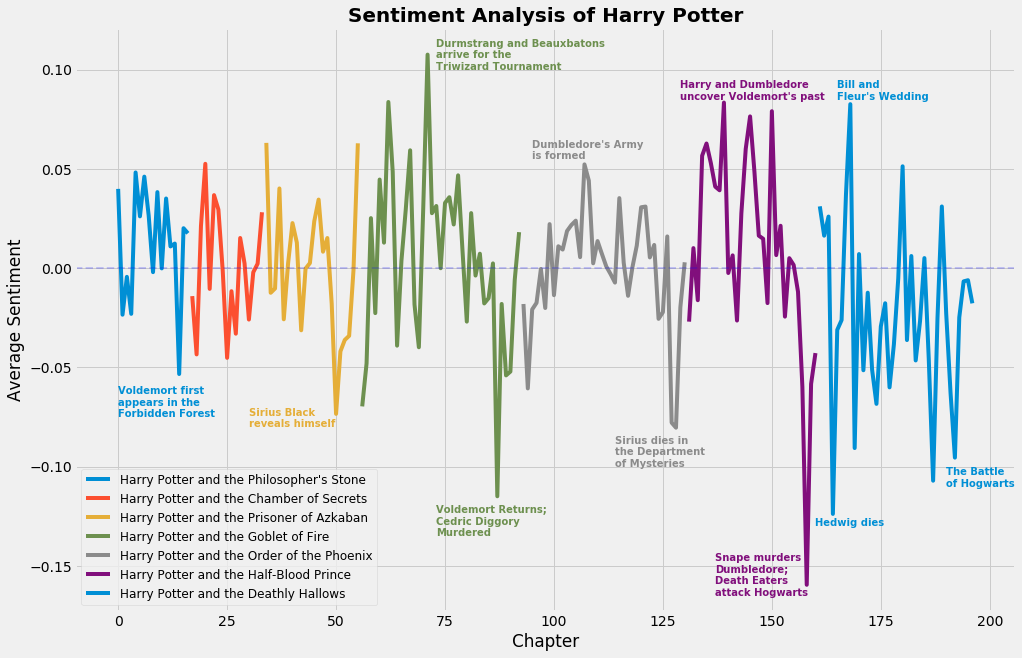

In [8]:
#plot
length = sum([len(hp[book]) for book in hp])
x = np.arange(length)
y = [hp[book][chapter][2]['compound'] for book in hp for chapter in hp[book]]

plt.figure(figsize=(15,10))
for book in book_indices:
    plt.plot(x[book_indices[book][0]:book_indices[book][1]],
             y[book_indices[book][0]:book_indices[book][1]],
             label = book)
plt.axhline(y = 0, xmin=0, xmax=length, alpha=.2, color='b', linestyle='--', linewidth=2)
plt.legend(loc=3, fontsize=12)
plt.xlabel('Chapter')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Analysis of Harry Potter', weight='bold', fontsize=20)

#annotation
plt.text(0,-0.075,s='''Voldemort first 
appears in the 
Forbidden Forest''', color='#008fd5', weight='bold', fontsize=10)
plt.text(30,-0.08,s='''Sirius Black 
reveals himself''', color='#e5ae38', weight='bold', fontsize=10)
plt.text(73,.10,s='''Durmstrang and Beauxbatons 
arrive for the 
Triwizard Tournament''', color='#6d904f', weight='bold', fontsize=10)
plt.text(73,-.135,s='''Voldemort Returns; 
Cedric Diggory
Murdered''', color='#6d904f', weight='bold', fontsize=10)
plt.text(95, 0.055, s='''Dumbledore\'s Army
is formed''', color='#8b8b8b', weight='bold', fontsize=10)
plt.text(114, -0.1, s='''Sirius dies in
the Department
of Mysteries''', color='#8b8b8b', weight='bold', fontsize=10)
plt.text(129, 0.085, s='''Harry and Dumbledore
uncover Voldemort\'s past''', color='#810f7c', weight='bold', fontsize=10)
plt.text(137, -0.165, s='''Snape murders 
Dumbledore;
Death Eaters 
attack Hogwarts''', color='#810f7c', weight='bold', fontsize=10)
plt.text(160, -0.13, s='''Hedwig dies''', color='#008fd5', weight='bold', fontsize=10)
plt.text(165, 0.085, s='''Bill and
Fleur\'s Wedding''', color='#008fd5', weight='bold', fontsize=10)
plt.text(190, -0.11, s='''The Battle 
of Hogwarts''', color='#008fd5', weight='bold', fontsize=10)

plt.show()

### We can also look at the results from a specific chapter.

### Here we focus on one of my personal favourites: Harry facing off against the Hungarian Horntail Dragon in the first task of the Triwizard tournament (Goblet of Fire Chapter 20, THE FIRST TASK).  

In [9]:
def moving_average(x, w): #individual sentences are noisy, so use a simple moving average
    return np.convolve(x, np.ones(w), 'valid') / w

book = 'Harry Potter and the Goblet of Fire'
chap = 'CHAPTER TWENTY'
s = []
for sentence in hp[book][chap][1]:
    score = analyzer.polarity_scores(sentence)
    s.append(score['compound'])
s = np.array(s)           #put chapter score into array

window = 35
rm = moving_average(s, window) #calculate moving average

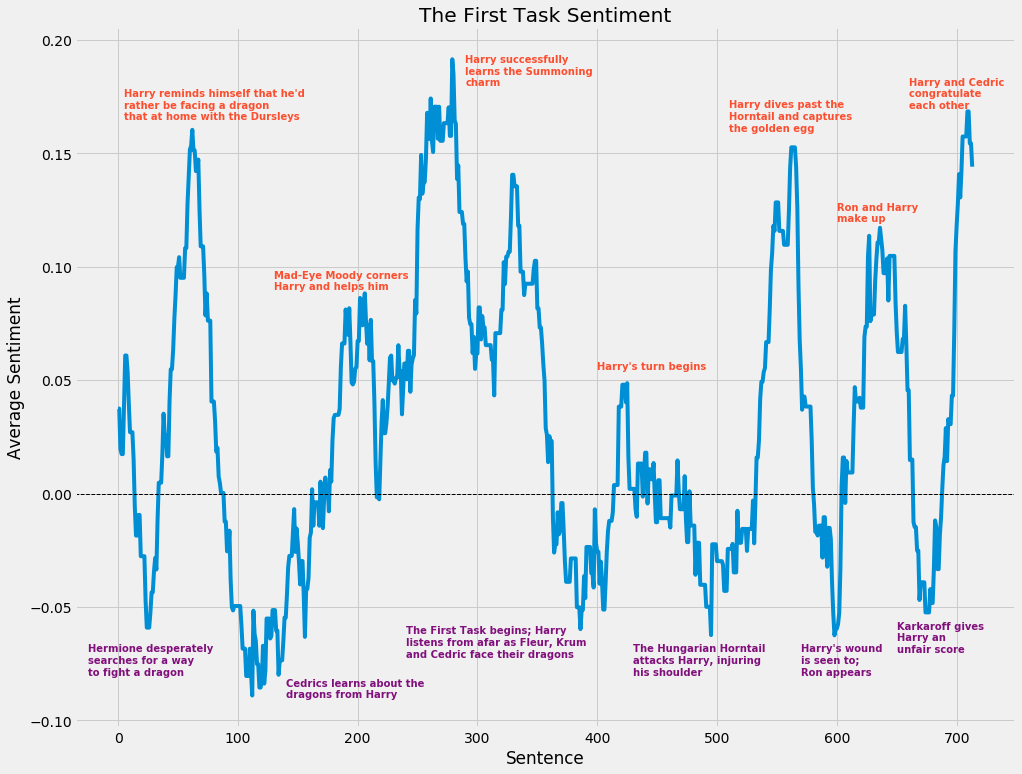

In [10]:
#plot
x = np.arange(len(s)-(window-1))
plt.figure(figsize=(15,12))
plt.plot(x, rm)
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('The First Task Sentiment')
plt.ylabel('Average Sentiment')
plt.xlabel('Sentence')

#annotation
plt.text(-25,-.08, s='''Hermione desperately 
searches for a way 
to fight a dragon''', fontsize=10, weight='bold', color='#810f7c')
plt.text(5,.165, s='''Harry reminds himself that he'd
rather be facing a dragon   
that at home with the Dursleys''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(140,-.09, s='''Cedrics learns about the 
dragons from Harry''', fontsize=10, weight='bold', color='#810f7c')
plt.text(130,.09, s='''Mad-Eye Moody corners 
Harry and helps him''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(290,.18, s='''Harry successfully 
learns the Summoning 
charm''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(240,-.072, s='''The First Task begins; Harry
listens from afar as Fleur, Krum 
and Cedric face their dragons''', fontsize=10, weight='bold', color='#810f7c')
plt.text(400,.055, s='''Harry's turn begins''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(430,-.08, s='''The Hungarian Horntail 
attacks Harry, injuring 
his shoulder''', fontsize=10, weight='bold', color='#810f7c')
plt.text(510,.16, s='''Harry dives past the 
Horntail and captures 
the golden egg''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(570,-.08, s='''Harry's wound 
is seen to; 
Ron appears''', fontsize=10, weight='bold', color='#810f7c')
plt.text(600,.12, s='''Ron and Harry
make up ''', fontsize=10, weight='bold', color='#fc4f30')
plt.text(650,-.07, s='''Karkaroff gives
Harry an 
unfair score''', fontsize=10, weight='bold', color='#810f7c')
plt.text(660,.17, s='''Harry and Cedric 
congratulate 
each other''', fontsize=10, weight='bold', color='#fc4f30')
plt.show()

Whilst the analysis is noisy, **it does reasonably well at capturing Harry's wildly changing emotions** across the course of the chapter. 

### Finally, let's look at the books on a per-character basis:

Since **most characters do not appear in most chapters**, it only really makes sense to look at the sentiment of specific characters on a **per-book basis**. 

To do this, for each character we take **only the sentences mentioning them by name**.

This is an imperfect method, as a character **does not need to be named to be the subject of a sentence**. Nevertheless, we will try it out.

In [12]:
chars = ['Harry', 'Ron', 'Hermione',  #choose main characters
         'Neville', 'Luna',
         'Dumbledore', 'Hagrid', 
         'Malfoy', 'Snape', 'Voldemort']

char_dict = {}
for char in chars:
    char_dict[char] = []
for book in hp:
    counts = np.zeros(len(chars))
    s = 0
    for chapter in hp[book]:
        s += len(hp[book][chapter][1])
        
        char_chapter_dict = {}
        for char in chars:
            char_chapter_dict[char] = []

        for sentence in hp[book][chapter][1]:
            spl = sentence.split()
            for i, char in enumerate(chars):
                if char in spl or char+'\'s' in spl:
                    counts[i] += 1
                    
                    vs = analyzer.polarity_scores(sentence)
                    char_chapter_dict[char].append(vs['compound'])
                    
        for char in chars:
            char_dict[char].append(np.mean(char_chapter_dict[char]))
    
    print('\nTotal Sentences in', book, ':', s)
    for i, char in enumerate(chars):
        print(char, 'mentioned in:', int(counts[i]), 'of sentences.')
        
char_book_dict = {} #average scores over each book, rather than each chapter
for char in char_dict:
    
    char_book_dict[char] = []
    
    for book in book_indices:
        m = np.nanmean(char_dict[char][book_indices[book][0]:book_indices[book][1]])
        char_book_dict[char].append(m) 



Total Sentences in Harry Potter and the Philosopher's Stone : 6394
Harry mentioned in: 971 of sentences.
Ron mentioned in: 261 of sentences.
Hermione mentioned in: 182 of sentences.
Neville mentioned in: 67 of sentences.
Luna mentioned in: 0 of sentences.
Dumbledore mentioned in: 96 of sentences.
Hagrid mentioned in: 223 of sentences.
Malfoy mentioned in: 74 of sentences.
Snape mentioned in: 120 of sentences.
Voldemort mentioned in: 24 of sentences.

Total Sentences in Harry Potter and the Chamber of Secrets : 6939
Harry mentioned in: 1149 of sentences.
Ron mentioned in: 437 of sentences.
Hermione mentioned in: 218 of sentences.
Neville mentioned in: 25 of sentences.
Luna mentioned in: 0 of sentences.
Dumbledore mentioned in: 90 of sentences.
Hagrid mentioned in: 102 of sentences.
Malfoy mentioned in: 122 of sentences.
Snape mentioned in: 69 of sentences.
Voldemort mentioned in: 14 of sentences.

Total Sentences in Harry Potter and the Prisoner of Azkaban : 8582
Harry mentioned in: 13

/home/sam/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice


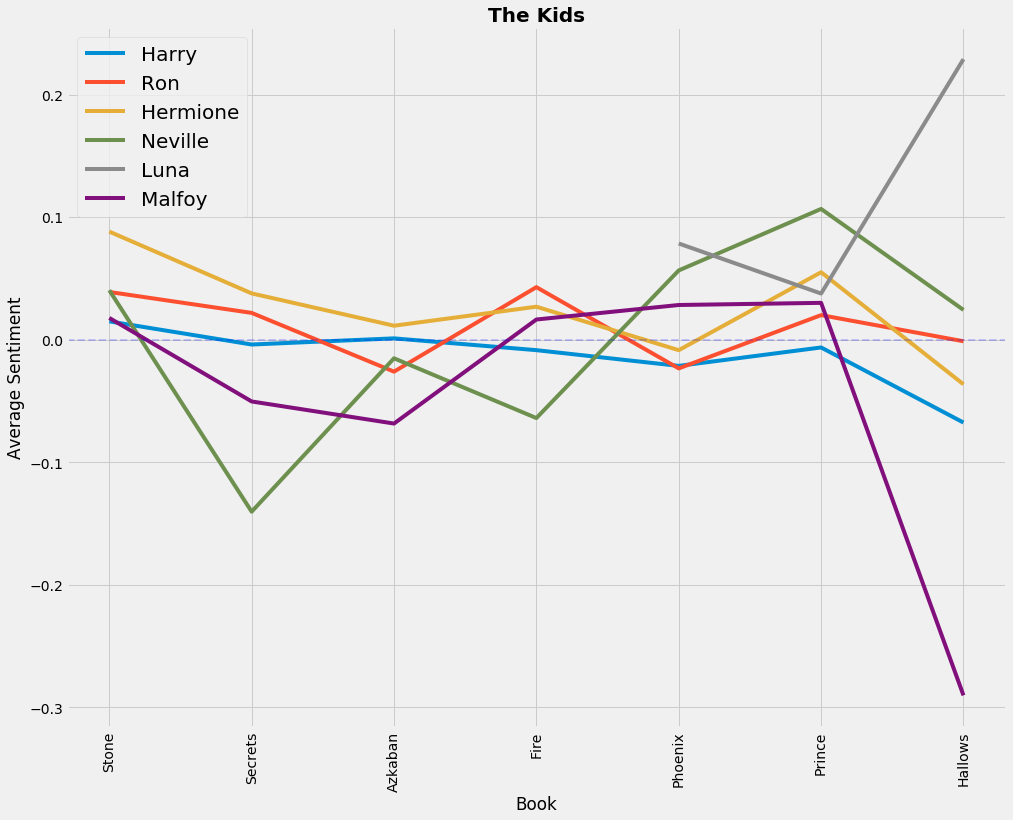

In [13]:
#plot
plt.figure(figsize=(15,12))
for char in ['Harry', 'Ron', 'Hermione', 'Neville', 'Luna', 'Malfoy']:
    x = np.arange(7)+1
    y = char_book_dict[char]
    plt.plot(x,
             y,
             label = char)
        
plt.xlabel('Book')
plt.ylabel('Average Sentiment')
plt.title('The Kids', weight='bold', fontsize=20)
plt.axhline(y = 0, xmin=0, xmax=length, alpha=.2, color='b', linestyle='--', linewidth=2)
plt.legend(loc=2, fontsize=20)
plt.xticks(ticks=x, labels=[item.split()[-1] for item in names], rotation=90)
plt.show()

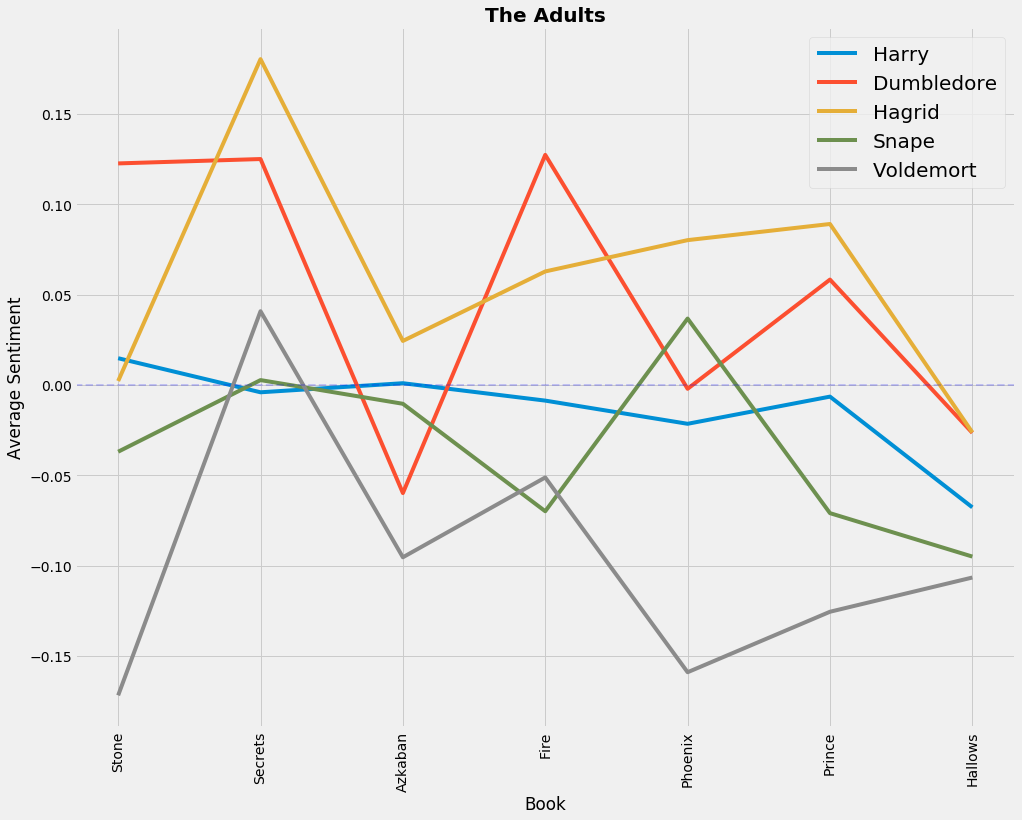

In [14]:
#plot
plt.figure(figsize=(15,12))
for char in ['Harry', 'Dumbledore', 'Hagrid', 'Snape', 'Voldemort']:
    x = np.arange(7)+1
    y = char_book_dict[char]
    plt.plot(x,
             y,
             label = char)
        
plt.xlabel('Book')
plt.ylabel('Average Sentiment')
plt.title('The Adults', weight='bold', fontsize=20)
plt.axhline(y = 0, xmin=0, xmax=length, alpha=.2, color='b', linestyle='--', linewidth=2)
plt.legend(loc=1, fontsize=20)
plt.xticks(ticks=x, labels=[item.split()[-1] for item in names], rotation=90)
plt.show()

In [15]:
#find most positive and negative characters 
text = []
print('Calculating the most positive and negative characters in each book...')
print('\n Most Positive: \n')
for i in range(n_books):
    pos = max(char_book_dict, key=lambda key: char_book_dict[key][i])
    print(names[i].split()[-1]+':', pos)
print('\n Most Negative: \n')
for i in range(n_books):
    neg = min(char_book_dict, key=lambda key: char_book_dict[key][i])
    print(names[i].split()[-1]+':', neg)

Calculating the most positive and negative characters in each book...

 Most Positive: 

Stone: Dumbledore
Secrets: Hagrid
Azkaban: Hagrid
Fire: Dumbledore
Phoenix: Hagrid
Prince: Neville
Hallows: Luna

 Most Negative: 

Stone: Voldemort
Secrets: Neville
Azkaban: Voldemort
Fire: Snape
Phoenix: Voldemort
Prince: Voldemort
Hallows: Malfoy


The results are interesting, if not unsurprising. **Dumbledore and Hagrid** are the most positive characters in the early books, with **Neville and Luna** becoming the most positive in the final two books.

**Voldemort** has the most negative sentiment in four of the seven books, with **Snape and Malfoy** also making the list. The other name is **Neville**, who is the only character to have both the most negative and positive sentiment throughout the series. Considering how Neville turns from a **bumbling, forgetful dead-weight** to a **courageous, Horcrux-destorying hero** over the course of the series, this is perhaps unsurprising!

### **'There are all kinds of courage,’ said Dumbledore, smiling. ‘It takes a great deal of bravery to stand up to our enemies, but just as much to stand up to our friends. I therefore award ten points to Mr Neville Longbottom.'** (Philosopher's Stone Chapter Seventeen, THE MAN WTH TWO FACES)